In [1]:
import pickle
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt

sns.set_style("darkgrid")

In [2]:
#read data
data = pd.read_csv('Cardiovascular.csv',index_col = 'ind',sep = ';')
data.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [3]:
##Encode the family history so it shows numbers instead of the words, that way we can be able to plot family history attribute
def encode(s):
    s = s.lower()
    if s == 'present':
        return 1
    return 0
try:
    data.famhist = data.famhist.apply(encode)
except:
    print("Already encoded")
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


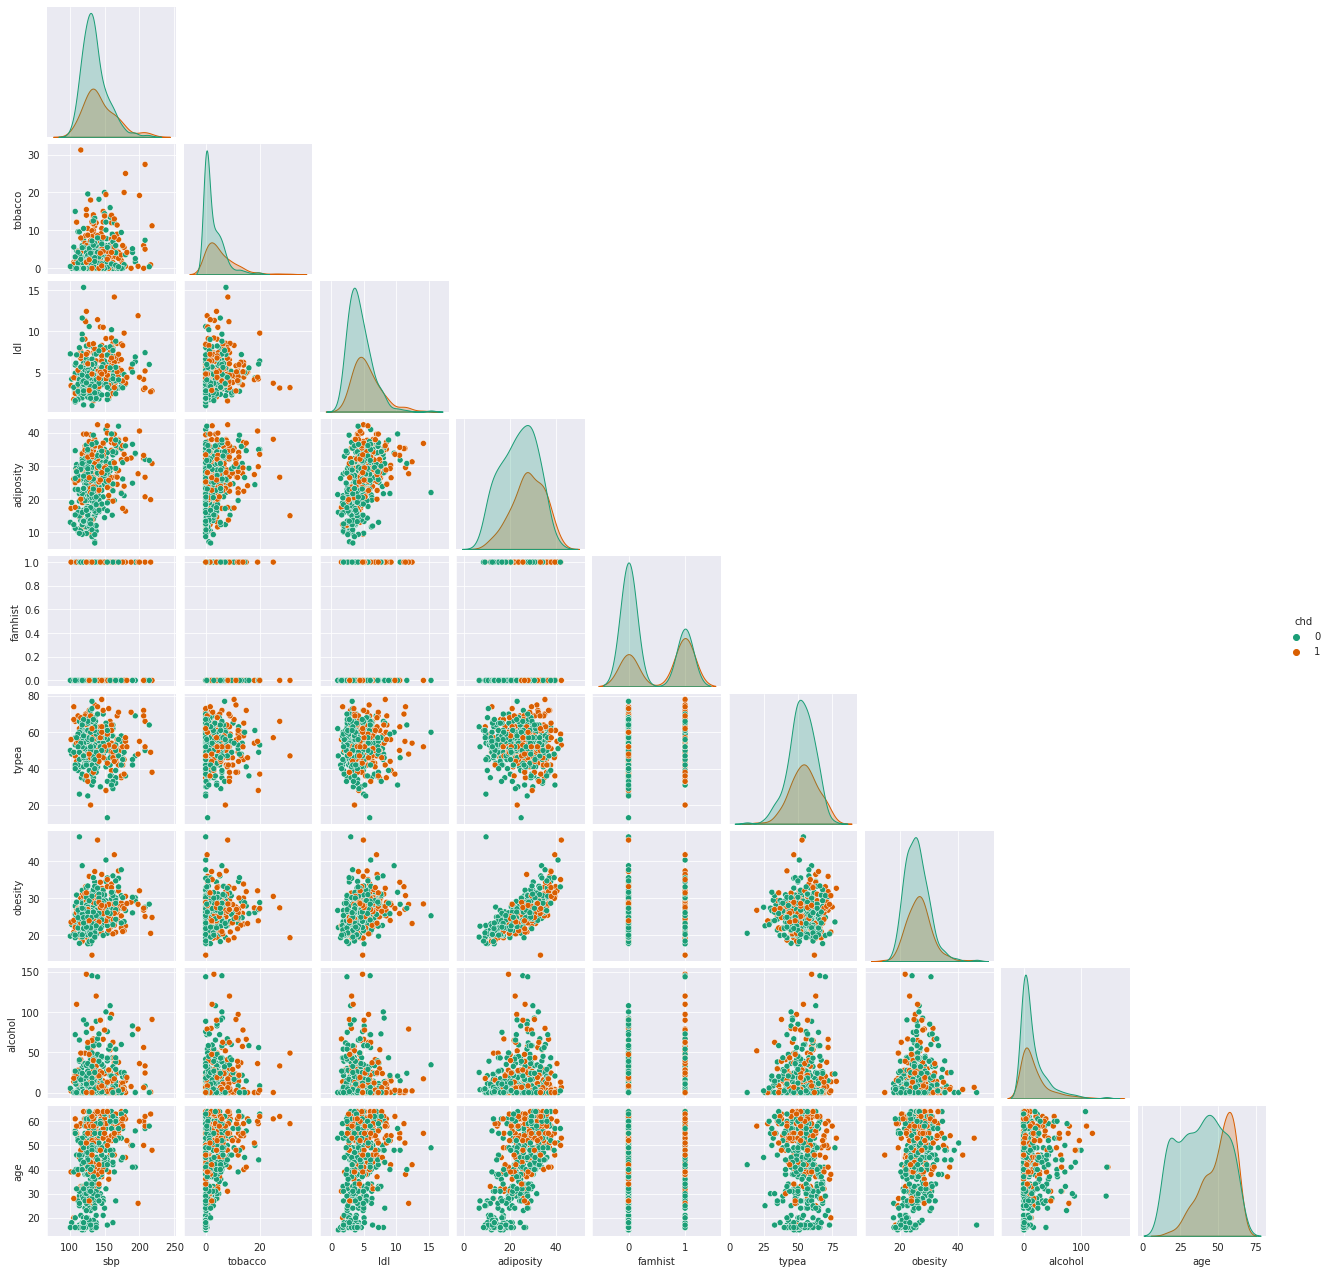

In [9]:
mat_plot = sns.pairplot(data,hue='chd',diag_kind="kde",palette='Dark2',corner=True, height = 2)
plt.show()

In [19]:
data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


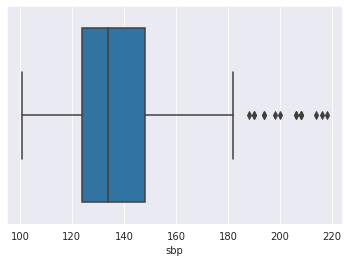

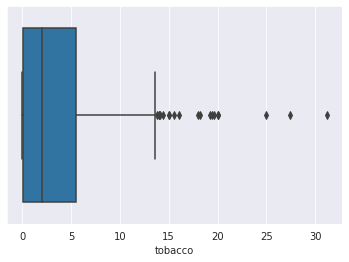

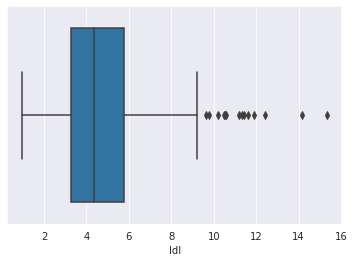

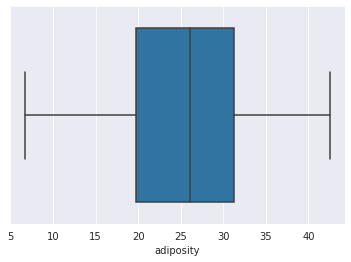

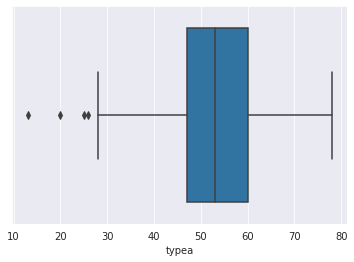

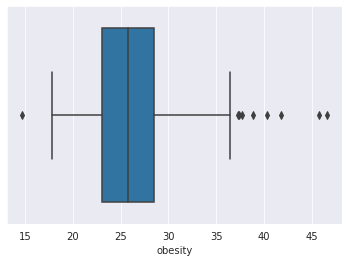

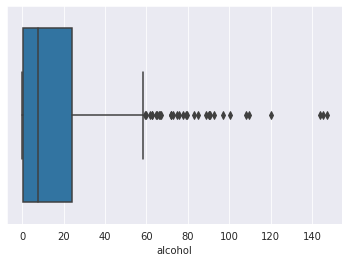

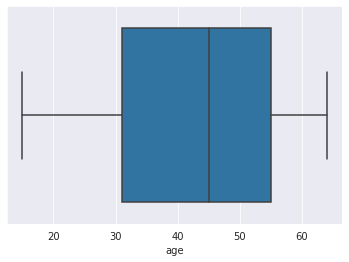

In [21]:
##Box plots for each feature

features = data.columns[0:9]

##Remove family history
features = features.drop(['famhist'])
for f in features:
    sns.boxplot(x=data[f])
    plt.show()